# Heart Failure

## Pendahuluan


Penyakit kardiovaskular (CVDs) adalah penyebab kematian nomor 1 secara global, mengambil sekitar 17,9 juta jiwa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia.
Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, diet tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi.

Orang dengan penyakit kardiovaskular atau yang memiliki risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada) memerlukan deteksi dan pengelolaan dini.

### Import Library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

### Mengakses Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dityaanggraheni/Decision-Tree/main/heart_failure_clinical_records_dataset.csv')
df.head() 

age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
0  75.0        0                       582  ...        0     4            1
1  55.0        0                      7861  ...        0     6            1
2  65.0        0                       146  ...        1     7            1
3  50.0        1                       111  ...        0     7            1
4  65.0        1                       160  ...        0     8            1

[5 rows x 13 columns]

### Tujuan analisis data

Melakukan klasifikasi untuk prediksi gagal jantung menggunakan dataset Heart Failure dengan metode decision tree klasifikasi

### Memahami dataset

Dataset Heart Failure dibuat untuk membuat machine learning untuk melakukan klasifikasi biner(Meninggal atau Tidak Meninggal). Variabel-variabel yang terdapat pada dataset ini adalah sebagai berikut:
1. **age** = Umur pasien 
2. **anaemia** = Penurunan sel darah merah atau hemoglobin(0=Tidak, 1=Ya)
3. **creatinine_phosphokinase** = Tingkat enzim creatinine phosphokinase dalam darah
4. **diabetes** = Menderita diabetes(0=Tidak, 1=Ya)
5. **ejection_fraction** = Persentase darah yang meninggalkan jantung pada setiap kontraksi
6. **high_blood_pressure** = Menderita hipertensi(0=Tidak, 1=Ya)
7. **platelets** = Trombosit dalam darah
8. **serum_creatinine** = Tingkat kreatinin dalam darah
9. **serum_sodium** =Tingkat natrium dalam darah
10. **sex** = Jenis kelamin(Female/male)
11. **smoking** = perokok(0=Tidak, 1=Ya)
12. **time** = Periode tindak lanjut
13. **DEATH_EVENT** =  Jika pasien meninggal selama masa tindak lanjut(0=Tidak, 1=Ya)

## EDA

### Dimensi Data

In [3]:
df.shape

(299, 13)

Dataset Heart Failure memiliki data dengan 13 kolom dan 299 baris

### Variabel Pada Dataset

In [4]:
df.columns.values 

array(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'], dtype=object)

In [5]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Menampilkan variabel-variabel dalam dataset beserta tipe data masing-masing variabel

### Mengecek Missing Data

In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Tidak ada data yang hilang

### Mengecek Duplikat Data

In [8]:
df.duplicated().sum()

0

tidak ada data yang sama

### Mengecek Outliner

<function matplotlib.pyplot.tight_layout>

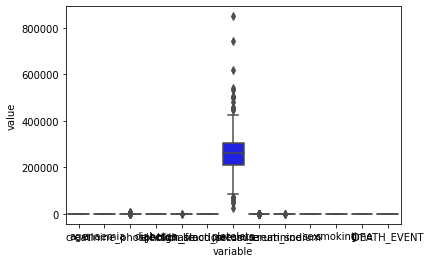

In [9]:
sns.boxplot(x="variable", y="value", color='blue', data=pd.melt(df))
plt.tight_layout

Kolom numeric yang memiliki outlier adalah creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, dan serum_sodium

### Melihat Korelasi Data

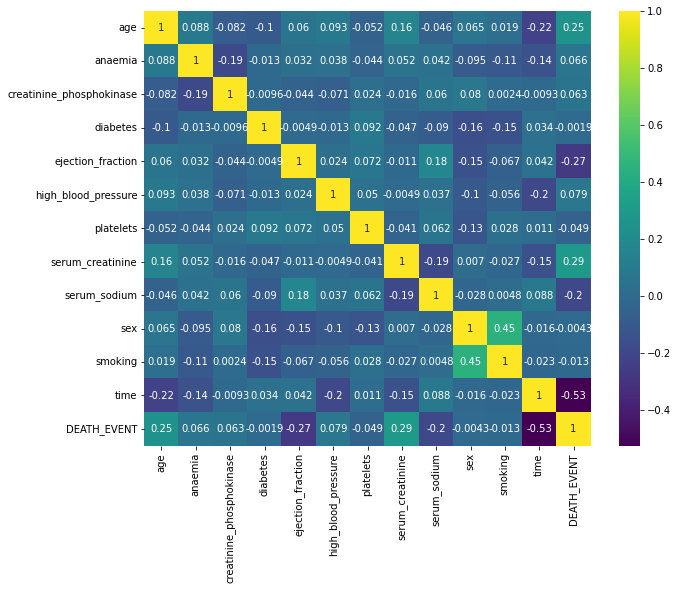

In [10]:
k = len(df.columns)
cm = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap = 'viridis')

Melihat hubungan antara nilai kategorikal dan DEATH_EVENT, menggunakan boxplot dari seaborn

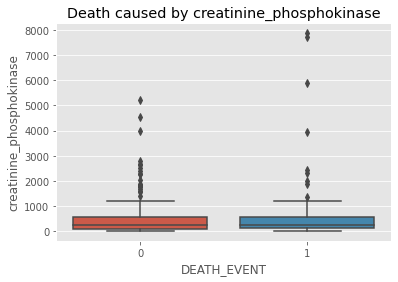

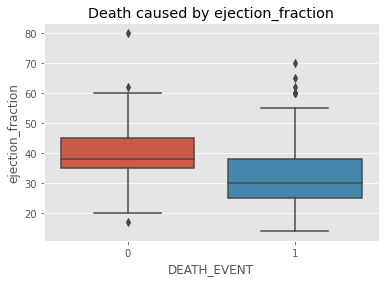

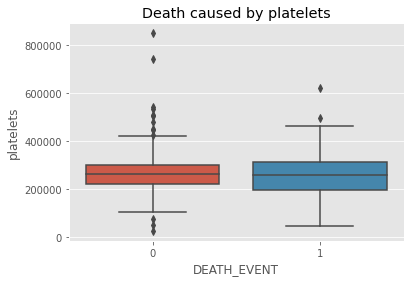

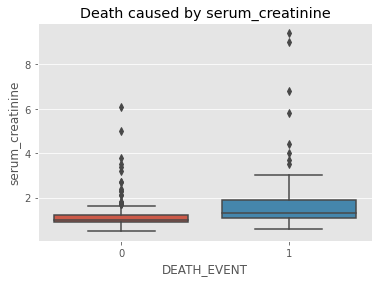

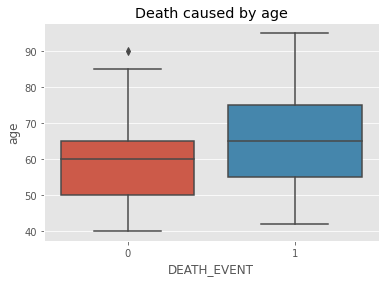

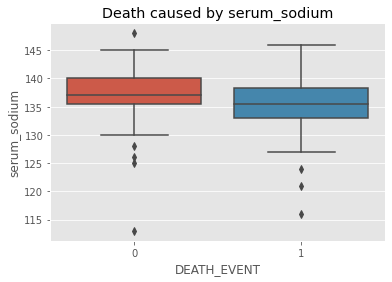

In [11]:
plt.style.use('ggplot')
Y = df[['creatinine_phosphokinase', 'ejection_fraction', 'platelets',
        'serum_creatinine','age', 'serum_sodium']]
for col in Y:
    sns.boxplot(x='DEATH_EVENT', y=col, data=df)
    plt.title( 'Death caused by ' + col)
    plt.show()

dari boxplot di atas serum sodium, age, platelets, serum creatinine and ejection fraction adalah pengklasifikasi yang baik dari DEATH_EVENT

### Melihat Statistik Data

In [12]:
df.describe()

age     anaemia  ...        time  DEATH_EVENT
count  299.000000  299.000000  ...  299.000000    299.00000
mean    60.833893    0.431438  ...  130.260870      0.32107
std     11.894809    0.496107  ...   77.614208      0.46767
min     40.000000    0.000000  ...    4.000000      0.00000
25%     51.000000    0.000000  ...   73.000000      0.00000
50%     60.000000    0.000000  ...  115.000000      0.00000
75%     70.000000    1.000000  ...  203.000000      1.00000
max     95.000000    1.000000  ...  285.000000      1.00000

[8 rows x 13 columns]

## Data Preprocessing

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [14]:
# Memilih Variabel Target dan Variabel Independen
x = df.drop('DEATH_EVENT', axis=1)
X = x.values
y = df['DEATH_EVENT'].values

# Membagi data menjadi data training dan data testring
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('Train Size: \n', x_train.shape)
print('Test Size: \n', x_test.shape)

Train Size: 
 (239, 12)
Test Size: 
 (60, 12)


In [15]:
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score

In [16]:
for i in range(4, 10):
    death_tree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    death_tree.fit(x_train, y_train)
    pred_death = death_tree.predict(x_test)
    print('dengan max_depth: {}, Akurasi: {}'.format (i, metrics.accuracy_score(y_test, pred_death)))
    print('dengan max_depth: {}, Recall: {}'.format(i,recall_score(y_test, pred_death)))
    print('dengan max_depth: {}, Precision: {}'.format(i,precision_score(y_test, pred_death)))
    print('dengan max_depth: {}, F1-Score: {}'.format(i,f1_score(y_test, pred_death)))
    print('\n')

dengan max_depth: 4, Akurasi: 0.8333333333333334
dengan max_depth: 4, Recall: 0.8571428571428571
dengan max_depth: 4, Precision: 0.6
dengan max_depth: 4, F1-Score: 0.7058823529411764


dengan max_depth: 5, Akurasi: 0.85
dengan max_depth: 5, Recall: 0.7857142857142857
dengan max_depth: 5, Precision: 0.6470588235294118
dengan max_depth: 5, F1-Score: 0.7096774193548386


dengan max_depth: 6, Akurasi: 0.9
dengan max_depth: 6, Recall: 0.6428571428571429
dengan max_depth: 6, Precision: 0.9
dengan max_depth: 6, F1-Score: 0.75


dengan max_depth: 7, Akurasi: 0.8833333333333333
dengan max_depth: 7, Recall: 0.7142857142857143
dengan max_depth: 7, Precision: 0.7692307692307693
dengan max_depth: 7, F1-Score: 0.7407407407407408


dengan max_depth: 8, Akurasi: 0.9
dengan max_depth: 8, Recall: 0.7857142857142857
dengan max_depth: 8, Precision: 0.7857142857142857
dengan max_depth: 8, F1-Score: 0.7857142857142857


dengan max_depth: 9, Akurasi: 0.8833333333333333
dengan max_depth: 9, Recall: 0.64285714

In [17]:
death_tree = DecisionTreeClassifier(criterion='entropy', max_depth=6)
death_tree.fit(x_train, y_train)
pred_death = death_tree.predict(x_test)
print('dengan max_depth: {} , Akurasi: {}'.format (6, metrics.accuracy_score(y_test, pred_death)))
print('dengan max_depth: {}, Recall: {}'.format(6,recall_score(y_test, pred_death)))
print('dengan max_depth: {}, Precision: {}'.format(6,precision_score(y_test, pred_death)))
print('dengan max_depth: {}, F1-Score: {}'.format(6,f1_score(y_test, pred_death)))

dengan max_depth: 6 , Akurasi: 0.9333333333333333
dengan max_depth: 6, Recall: 0.7857142857142857
dengan max_depth: 6, Precision: 0.9166666666666666
dengan max_depth: 6, F1-Score: 0.8461538461538461


output di atas menunjukkan akurasi terbaik dari model dengan depth yang berbeda dan model memberikan akurasi maksimum 0,9.

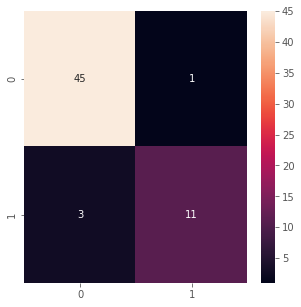

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
metrics.confusion_matrix(y_test, pred_death)
plt.figure(figsize = (5,5))
sns.heatmap(metrics.confusion_matrix(y_test, pred_death), annot = True)

Anggap yang meninggal label positif sedangkan yang tidak meninggal label negatif
True Negatif (TN): model memprediksi seorang pasien gagal jantung tidak meninggal dan memang kenyataan pasien tersebut tidak meninggal
True Positif (TP): model memprediksi seorang pasien gagal jantung meninggal dan memang kenyataan pasien tersebut meninggal
False Negatif (FN): model memprediksi seorang pasien gagal jantung tidak meninggal dan kenyataannya pasien tersebut meninggal
False Positif (FP): model memprediksi seorang pasien gagal jantung meninggal dan kenyataannya pasien tersebut tidak meninggal

TN=45, FP=1, FN=3 TP=11

### Visualisasi Decision Tree

In [19]:
from sklearn import tree
import graphviz

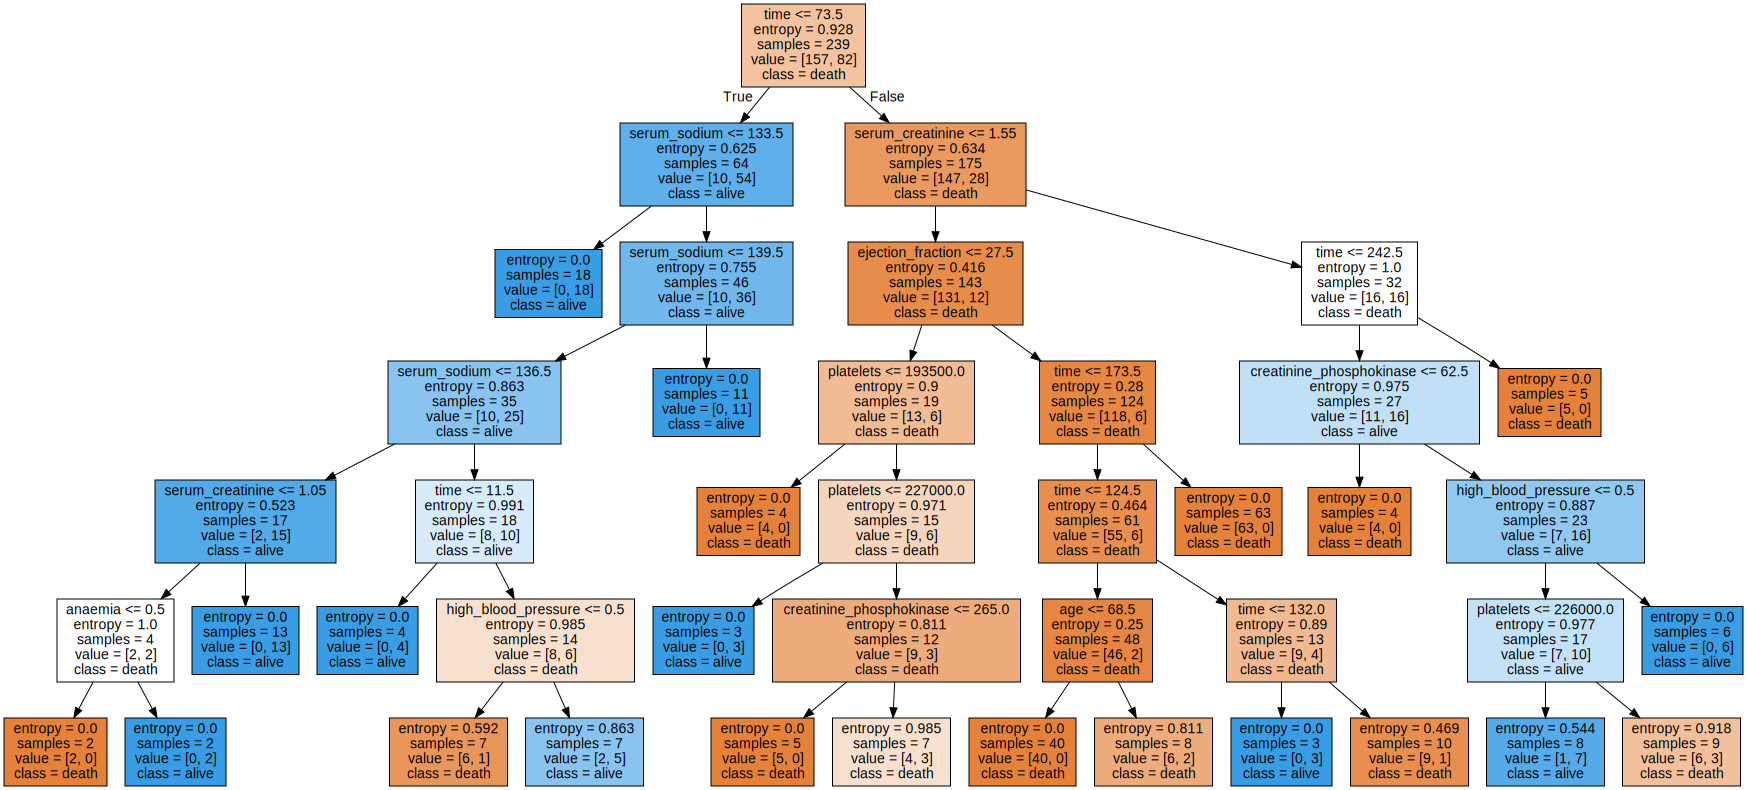

In [20]:
filename ='death_tree.png'

featureNames = df.columns[:-1]
targetNames = ['death', 'alive']

dot_data = tree.export_graphviz(death_tree, feature_names=featureNames, class_names=targetNames,filled=True)

# Menggambar grafik
graph = graphviz.Source(dot_data, format="png") 
graph